# Tarefa 1

<b>Alunos:</b> Andreza(164213), Gil(225323) e Yan(118982)

## Importando as bibliotecas

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = [12, 8]

## Ler arquivo dados.npy
 <ul> 
    <li>Arquivo de 10500 linhas e 784 colunas, mas cada linha é uma matriz 28x28</li>
    </ul>

In [2]:
X = np.load("dados.npy")
X.shape

(10500, 784)

Se formos traduzir esta matriz, diríamos que ela apresenta em suas colunas o total de dimensões de cada imagem, e um total de 10500 imagens.

## Imprima a imagem dos 3 primeiros dígitos
 <ul> 
    <li>Passo 1: cada linha da matriz precisa ser transformada em outra matriz 28x28;</li>
    <li>Passo 2: codificação das cores para cinza;</li>
    <li>Passo 3: imprimir as 3 primeiras imagens;</li>
    </ul>

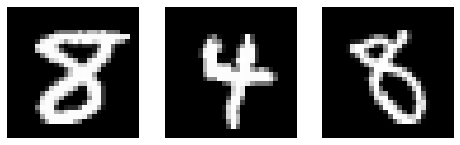

In [3]:
fig=plt.figure(figsize=(8, 8))
for i in range(0, 3):
    img = np.reshape(X[i], (28,28))
    fig.add_subplot(1, 3, i+1)
    img=plt.imshow(img)
    plt.axis('off')
    img.set_cmap('gray')
plt.show()

## Faça a fatoração SVD da matrix
 <ul> 
    <li>3.1: normalizar os dados para média O e desvio-padrão diferente de 1;</li>
    <li>3.2: fazer fatoração full_matrix e compacta;</li>
    <li>3.3: verificar o tamanho das matrizes;</li>
    </ul>
    
###  Normalização

In [4]:
scaler = StandardScaler(with_std=False)
Xmz=scaler.fit_transform(X)
Xmz.shape

(10500, 784)

### SVD  Matriz Full

In [5]:
# Fatoração SVD full matrix
start = time.time()
U, S, VT = np.linalg.svd(Xmz, full_matrices=True)
S = np.diag(S)
time_elapsed = time.time() - start
print("Tempo de execução SVD full matrix: {:.3f} seconds".format(time_elapsed))
print(U.shape, S.shape, VT.shape)

Tempo de execução SVD full matrix: 166.914 seconds
(10500, 10500) (784, 784) (784, 784)


### SVD Matriz Compacta

In [6]:
# Fatoração SVD compacta
start = time.time()
U, S, VT = np.linalg.svd(Xmz, full_matrices=False)
S = np.diag(S)
time_elapsed = time.time() - start
print("Tempo de execução SVD compacto: {:.3f} seconds".format(time_elapsed))
print(U.shape, S.shape, VT.shape)

Tempo de execução SVD compacto: 18.040 seconds
(10500, 784) (784, 784) (784, 784)


## SVD truncado
 <ul> 
    <li>Usar a redução para 100 dimensões;</li>
    <li>4.1 Computar a matriz projetada. Será (10500, 100). Imprimir as dimensões;</li>
    <li>4.2 Computar a matriz reconstruída.Será (10500,784). Imprimir as dimensões;</li>
    </ul>

### Matriz Projetada

Dado que os dados projetados são representados pela multiplicação das matrizes Ur e Drxr, então selecionamos as r colunas da matriz U e as r linhas e colunas da matriz Sigma

In [7]:
r=100
Aproj = U[:,:r] @ S[:r,:r]
Aproj.shape

(10500, 100)

### Matriz Reconstruída

Já a matriz reconstruída será obtida multiplicando-se a matriz projetada pelas primeiras r linhas da matriz VT da seguinte forma

In [8]:
Arec = U[:,:r] @ S[:r,:r] @ VT[:r,]
Arec.shape

(10500, 784)

## Imprima a imagem reconstruída dos 3 primeiros dígitos
 <ul> 
    <li>Compare com as imagens impressas acima</li>
    </ul>

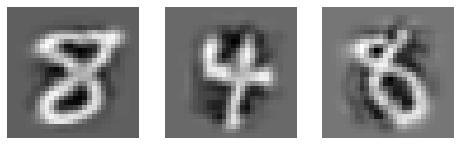

In [63]:
fig=plt.figure(figsize=(8, 8))
for i in range(0,3):
    A = Arec[i].reshape((28,28))
    fig.add_subplot(1, 3, i+1)
    img = plt.imshow(A,cmap='gray')
    plt.axis('off')
plt.show()

* Ao comparar com as imagens impressas anteriormente, podemos perceber que informações foram perdidas, reduzindo a nitidez dos dígitos e alterando a cor do fundo, porém ainda conseguimos visualizar e identificar os dígitos de forma correta.

## Imprima os 3 primeiros eigen-dígitos

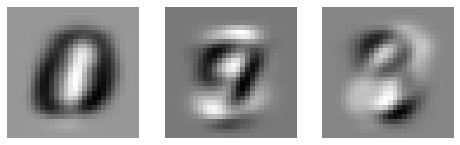

In [64]:
fig=plt.figure(figsize=(8, 8))
for i in range(0,3):
    A = VT[i].reshape((28,28))
    fig.add_subplot(1, 3, i+1)
    img = plt.imshow(A,cmap='gray')
    plt.axis('off')
plt.show()

## Decidindo o número de dimensões
 <ul> 
    <li>7.1 Quantas dimensões usando a regra de singular values maior que 1?</li>
    <li>7.2 Quantas dimensões manter para capturar 80% da variância dos dados?</li>
    <li>7.3 Quantas dimensões manter para capturar 95% da variância dos dados?</li>
    </ul>
    
### Para Singular Values > 1

In [54]:
print('Necessitamos {} dimensões'.format(S[S>1].shape[0]))

Necessitamos 671 dimensões


### Para 80% da variância

In [55]:
i=0
while np.cumsum(np.diag(S)/np.sum(np.diag(S)))[i]<0.8:
    i=i+1
print('Necessitamos {} dimensões'.format(i))

Necessitamos 234 dimensões


### Para 95% da variância

In [56]:
i=0
while np.cumsum(np.diag(S)/np.sum(np.diag(S)))[i]<0.95:
    i=i+1
print('Necessitamos {} dimensões \n'.format(i))

Necessitamos 425 dimensões 



## Extra: Gráfico das dimensões necessárias para as % de variâncias capturadas

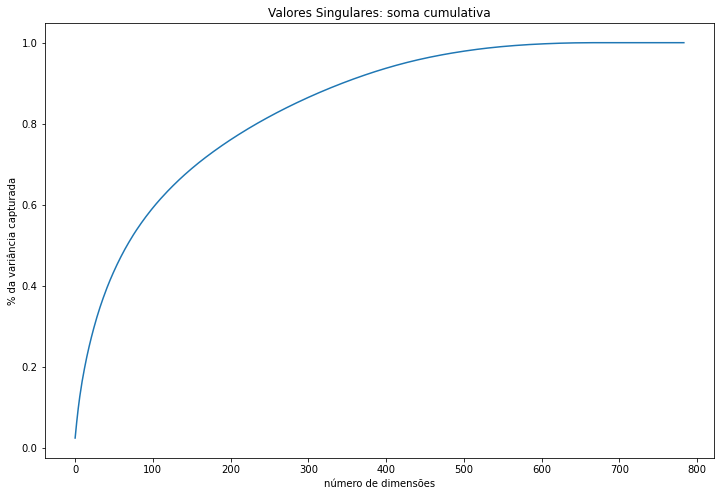

In [47]:
plt.figure(1)
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))
plt.title('Valores Singulares: soma cumulativa')
plt.xlabel('número de dimensões')
plt.ylabel('% da variância capturada')
plt.show()